In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 182s 1us/step


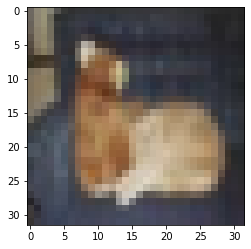

In [3]:
plt.imshow(x_train[17])

In [4]:
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [5]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=keras.utils.to_categorical(y_train, num_classes=10)
y_test=keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)

model.compile(opt_rms, loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,
                   epochs=25,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/25
782/782 [==============================] - 69s 89ms/step - loss: 1.8277 - accuracy: 0.3249 - val_loss: 1.5836 - val_accuracy: 0.4309
Epoch 2/25
782/782 [==============================] - 54s 69ms/step - loss: 1.5126 - accuracy: 0.4547 - val_loss: 1.4962 - val_accuracy: 0.4659
Epoch 3/25
782/782 [==============================] - 43s 55ms/step - loss: 1.3879 - accuracy: 0.5032 - val_loss: 1.3422 - val_accuracy: 0.5212
Epoch 4/25
782/782 [==============================] - 28s 36ms/step - loss: 1.3127 - accuracy: 0.5332 - val_loss: 1.2303 - val_accuracy: 0.5587
Epoch 5/25
782/782 [==============================] - 30s 38ms/step - loss: 1.2500 - accuracy: 0.5605 - val_loss: 1.2172 - val_accuracy: 0.5564
Epoch 6/25
782/782 [==============================] - 31s 40ms/step - loss: 1.2100 - accuracy: 0.5741 - val_loss: 1.1763 - val_accuracy: 0.5988
Epoch 7/25
782/782 [==============================] - 30s 38ms/step - loss: 1.1692 - accuracy: 0.5868 - val_loss: 1.1655 - val_accuracy: